In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import glob
import os

#import statannotations
from statannot import add_stat_annotation

In [75]:
# Open dfs

data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
data_20 = pd.read_csv(data_dir +'img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv').dropna()
data_21 = pd.read_csv(data_dir +'img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv').dropna()
data_22 = pd.read_csv(data_dir +'img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv').dropna()

data_21 = data_21[data_21['Date']!='2021-08-03']
dfs = [data_20, data_21, data_22]

In [76]:
# Add disease class column
for df in dfs:
    df['sev_class'] = 'low'
    df.loc[df['DM_severity'] > 10, 'sev_class'] = 'high'
    
    df['inc_class'] = 'low'
    df.loc[df['DM_inc'] > 25, 'inc_class'] = 'high'

In [77]:
# Add cbrt column
for df in dfs:
    df['sev_cbrt'] = np.cbrt(df['DM_severity'])
    df['inc_cbrt'] = np.cbrt(df['DM_inc'])

In [78]:
master_df = pd.concat(dfs)
master_df.columns

Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'sev_class', 'inc_class',
       'sev_cbrt', 'inc_cbrt'],
      dtype='object')

In [79]:
def spearman_df(veg_inds, df, var_name):
    corr_coeffs = []
    p_vals = []
    vi_list = []
    
    for vi in veg_inds:
        sp_r, p = scipy.stats.spearmanr(df[var_name], df[vi])
        corr_coeffs.append(sp_r)
        p_vals.append(p)
        vi_list.append(vi)
        dictionary = {'vi':vi_list,'spearmans_r':corr_coeffs, 'p_value':p_vals}
        corr_df = pd.DataFrame(dictionary).sort_values(by='spearmans_r')
        
    return corr_df

In [80]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_20 = spearman_df(vis, dfs[0], 'DM_severity')
print("Spearman's rank correlation, GDM Severity 2020\n\n", spear_20)

Spearman's rank correlation, GDM Severity 2020

             vi  spearmans_r       p_value
9     red_blue    -0.396854  2.492978e-19
11  green_blue    -0.080363  8.049414e-02
7     nir_blue     0.411072  9.434362e-21
0     savi_exp     0.586241  4.309590e-45
1         savi     0.586454  3.937843e-45
2        msavi     0.586512  3.843208e-45
3          evi     0.589791  9.502137e-46
8    nir_green     0.621222  6.188936e-52
4         arvi     0.632071  3.085604e-54
10   green_red     0.637252  2.276152e-55
5          gri     0.637472  2.034892e-55
6         ndvi     0.644698  4.914994e-57


In [81]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_20_cr = spearman_df(vis, dfs[0], 'sev_cbrt')
print("Spearman's rank correlation, Cubic root GDM Severity 2020\n\n", spear_20_cr)

Spearman's rank correlation, Cubic root GDM Severity 2020

             vi  spearmans_r       p_value
9     red_blue    -0.396854  2.492978e-19
11  green_blue    -0.080363  8.049414e-02
7     nir_blue     0.411072  9.434362e-21
0     savi_exp     0.586241  4.309590e-45
1         savi     0.586454  3.937843e-45
2        msavi     0.586512  3.843208e-45
3          evi     0.589791  9.502137e-46
8    nir_green     0.621222  6.188936e-52
4         arvi     0.632071  3.085604e-54
10   green_red     0.637252  2.276152e-55
5          gri     0.637472  2.034892e-55
6         ndvi     0.644698  4.914994e-57


In [82]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_20_inc = spearman_df(vis, dfs[0], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2020\n\n", spear_20_inc)

Spearman's rank correlation, GDM Incidence 2020

             vi  spearmans_r       p_value
9     red_blue    -0.391074  9.023927e-19
11  green_blue    -0.096235  3.621358e-02
7     nir_blue     0.385332  3.159874e-18
0     savi_exp     0.567531  9.230497e-42
1         savi     0.570155  3.243233e-42
2        msavi     0.574036  6.783844e-43
3          evi     0.574336  6.003844e-43
8    nir_green     0.594711  1.132994e-46
4         arvi     0.610703  8.697893e-50
10   green_red     0.613057  2.922283e-50
5          gri     0.613106  2.856945e-50
6         ndvi     0.615125  1.112678e-50


In [84]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_21_inc = spearman_df(vis, dfs[1], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2021\n\n", spear_21_inc)

Spearman's rank correlation, GDM Incidence 2021

             vi  spearmans_r       p_value
4         arvi    -0.350563  5.010064e-29
10   green_red    -0.333260  3.142974e-26
5          gri    -0.332921  3.550893e-26
3          evi    -0.217655  1.027145e-11
1         savi    -0.177008  3.601574e-08
6         ndvi    -0.172531  7.968016e-08
0     savi_exp    -0.155988  1.257102e-06
2        msavi    -0.143557  8.351263e-06
8    nir_green     0.080728  1.252965e-02
11  green_blue     0.231390  4.370109e-13
7     nir_blue     0.279765  1.192258e-18
9     red_blue     0.399861  5.205675e-38


In [71]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_21_sev = spearman_df(vis, dfs[1], 'DM_severity')
print("Spearman's rank correlation, GDM Severity 2021\n\n", spear_21_sev)

Spearman's rank correlation, GDM Severity 2021

             vi  spearmans_r       p_value
4         arvi    -0.303126  8.115181e-27
5          gri    -0.281630  3.175559e-23
10   green_red    -0.281499  3.333298e-23
3          evi    -0.178297  5.406077e-10
1         savi    -0.151408  1.449409e-07
0     savi_exp    -0.138615  1.509457e-06
2        msavi    -0.122601  2.139906e-05
6         ndvi    -0.117911  4.388013e-05
8    nir_green     0.113337  8.619271e-05
11  green_blue     0.191170  2.680251e-11
7     nir_blue     0.222997  6.235867e-15
9     red_blue     0.304714  4.280337e-27


In [72]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_22_inc = spearman_df(vis, dfs[2], 'DM_inc')
print("Spearman's rank correlation, GDM Incidence 2022\n\n", spear_22_inc)

Spearman's rank correlation, GDM Incidence 2022

             vi  spearmans_r       p_value
9     red_blue     0.196558  1.054931e-07
11  green_blue     0.270765  1.454376e-13
10   green_red     0.378420  6.245499e-26
5          gri     0.380009  3.753080e-26
2        msavi     0.391724  8.039136e-28
4         arvi     0.599265  2.129188e-71
3          evi     0.600799  7.562165e-72
1         savi     0.601369  5.139013e-72
0     savi_exp     0.613069  1.559894e-75
6         ndvi     0.638431  1.091518e-83
7     nir_blue     0.642577  4.278776e-85
8    nir_green     0.653271  7.939466e-89


In [73]:
vis = ['savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 
       'nir_blue','nir_green', 'red_blue', 'green_red', 'green_blue']

spear_22_sev = spearman_df(vis, dfs[2], 'DM_severity')
print("Spearman's rank correlation, GDM Incidence 2022\n\n", spear_22_sev)

Spearman's rank correlation, GDM Incidence 2022

             vi  spearmans_r       p_value
10   green_red    -0.189161  3.168408e-07
5          gri    -0.188969  3.258627e-07
4         arvi    -0.028116  4.512953e-01
6         ndvi     0.060456  1.050475e-01
8    nir_green     0.078667  3.481800e-02
7     nir_blue     0.080476  3.083851e-02
3          evi     0.084283  2.371925e-02
0     savi_exp     0.107946  3.732336e-03
1         savi     0.118471  1.449461e-03
2        msavi     0.266782  3.378029e-13
11  green_blue     0.313806  6.440226e-18
9     red_blue     0.329884  9.718187e-20


In [5]:
# def add_vis(dfs):
# #     dfs['ndvi']= (dfs['nir']-dfs['red'])/(dfs['nir']+dfs['red'])
# #     dfs['evi']= 2.5*(dfs['nir']-dfs['red'])/(dfs['nir']+6*dfs['red']-7.5*dfs['blue']+1)
# #     dfs['savi']= 1.5*(dfs['nir']-dfs['red'])/(dfs['nir']+dfs['red']+0.5)
# #     dfs['arvi']=(dfs['nir']-(2*dfs['red']-dfs['blue']))/(dfs['nir']+(2*dfs['red']-dfs['blue']))

#     dfs['sr']= dfs['nir']/dfs['red']
#     dfs['msr']= ((dfs['nir']/dfs['red'])-1)/(np.sqrt((dfs['nir']/dfs['red'])+1))
#     dfs['dvi']= dfs['nir']-dfs['red']
#     dfs['nirv']= dfs['ndvi']*dfs['nir']
#     dfs['gcc']=dfs['green']/(dfs['green']+dfs['red']+dfs['blue'])
#     dfs['tvi']=0.5*(120*(dfs['nir']-dfs['green'])-200*(dfs['red']-dfs['green']))
    
#     return dfs

In [7]:
# Add disease class column
df_vis['sev_class'] = 'low'
df_vis.loc[df_vis['DM_severity'] > 10, 'sev_class'] = 'high'

df_vis['inc_class'] = 'low'
df_vis.loc[df_vis['DM_inc'] > 25, 'inc_class'] = 'high'

In [12]:
# see if cube root normalizing helps

df_vis['sev_cbrt']= np.cbrt(df_vis['DM_severity'])
df_vis['inc_cbrt']= np.cbrt(df_vis['DM_inc'])


In [16]:
df_vis['sev_cbrt']

0      0.000000
1      0.368403
2      0.000000
3      0.000000
4      0.000000
         ...   
715    0.000000
716    0.584804
717    0.831552
718    0.000000
719    0.766309
Name: sev_cbrt, Length: 2414, dtype: float64

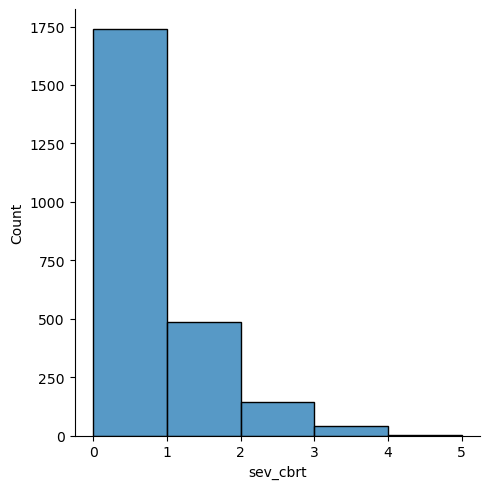

In [17]:
sns.displot(
     df_vis, x="sev_cbrt",
     binwidth=1, height=5) #facet_kws=dict(margin_titles=True),
plt.show()

In [15]:
# # Get just 2021
# ss_2021_dates = ss_2021.Date.unique()
# df_2021 = skysat_all[skysat_all['Date'].isin(ss_2021_dates)]
# df_2021.shape

(1195, 24)

In [16]:
# # Filter to just the downy mildew trial
# # This trial was conducted in the first 5 rows only in 2021

# dm_trial = df_2021[df_2021['row']<=5]

In [18]:
# # Find highest severity 

# dm_trial.DM_severity.max()

81.125

In [19]:
# Find lowest severity on the last day

# dm_trial[dm_trial['Date']=='2021-08-17']['DM_severity'].min()

0.1

In [20]:
# Print full entry for min. severity panel on the last day

# last_day = dm_trial[dm_trial['Date']=='2021-08-17']
# last_day[last_day['DM_severity']==0.1]

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,geometry,centroid,ndvi,evi,savi,sr,msr,gcc,arvi,disease_class
1026,20210816,68,0.015376,0.067317,0.04719,0.268572,5,4,2021-08-17,11.0,...,POLYGON ((-77.01553102784763 42.87844998993179...,POINT (-77.01557395530281 42.878462798620625),0.701106,0.385311,0.407072,5.691341,1.813595,0.518292,0.545403,low


In [22]:
# Print entry for highest severity day
# dm_trial[dm_trial['DM_severity']==81.125]

,acquired,plot,blue,green,red,nir,row,panel,Date,Treatment,...,geometry,centroid,ndvi,evi,savi,sr,msr,gcc,arvi,disease_class
552,20210802,73,0.00703,0.030007,0.029357,0.201513,5,9,2021-08-03,20.0,...,POLYGON ((-77.01596637781898 42.87853151993666...,POINT (-77.01600935030324 42.87854432363066),0.745687,0.324841,0.353325,6.864312,2.091157,0.451953,0.591753,high


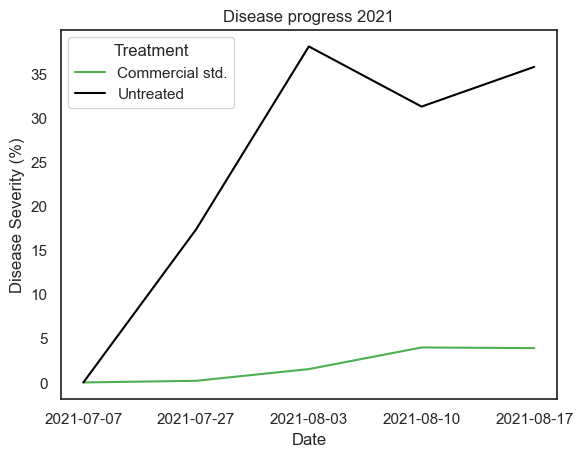

In [25]:
# Plot disease progress for utc and comm. standard
# UTC = untreated control
# comm standard = commercial standard (most effective fungicide)

# treats = [11,20]
# colors = ["#4CAF50", "#FFFFFF"]
# sns.set_theme(style='white')
# # Set your custom color palette
# sns.set_palette(sns.color_palette(colors))
# sns.lineplot(data=dm_trial[dm_trial['Treatment'].isin(treats)], x='Date', y= 'DM_severity', hue='Treatment',palette=["#4CAF50", "#000000"], errorbar=None)

# plt.xticks
# plt.ylabel('Disease Severity (%)')
# plt.legend(title='Treatment', loc='upper left', labels=['Commercial std.', 'Untreated'])
# plt.title('Disease progress 2021')
# plt.savefig('../figs/dis_prog.svg', bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.044e-02 U_stat=9.780e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.440e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.380e-04 U_stat=1.199e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.586e-01 U_stat=9.680e+02


Text(0.5, 1.0, 'ARVI 2021, DM Trial')

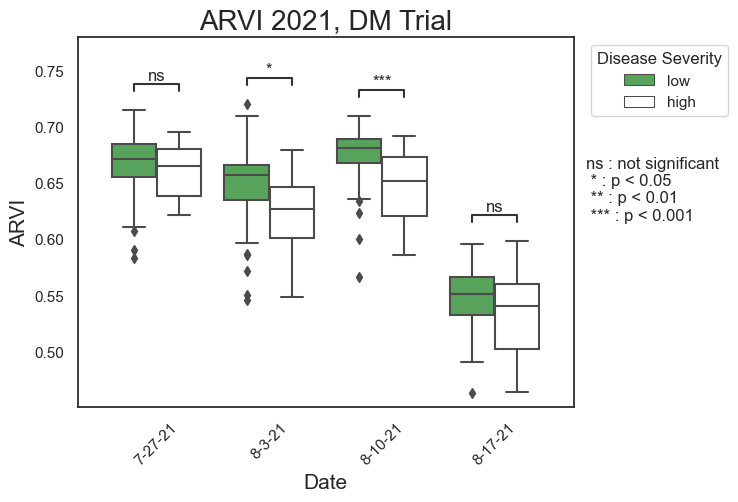

In [26]:
# x = "Date"
# y = "arvi"
# hue = "disease_class"
# hue_order=['low', 'high']
# order = dm_trial['Date'].unique()[1:]
# pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low"))
#     ]

# colors = ["#4CAF50", "#FFFFFF"]
# sns.set_palette(sns.color_palette(colors))

# ax = sns.boxplot(data=dm_trial, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
# ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
#                    rotation=45)
# add_stat_annotation(ax, data=dm_trial, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
#                     test='Mann-Whitney', loc='inside', verbose=2)


# plt.xlabel("Date", fontsize=15)
# plt.ylabel("ARVI", fontsize= 15)
# plt.legend(title='Disease Severity',loc='upper left', bbox_to_anchor=(1.02, 1) )
# plt.figtext(0.92, 0.5, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001', fontsize=12)
# plt.title("ARVI 2021, DM Trial", fontsize=20)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.647e-03 U_stat=9.870e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.790e-01 U_stat=6.210e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.007e-03 U_stat=1.171e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.655e-02 U_stat=1.089e+03


Text(0.5, 1.0, 'EVI 2021, DM Trial')

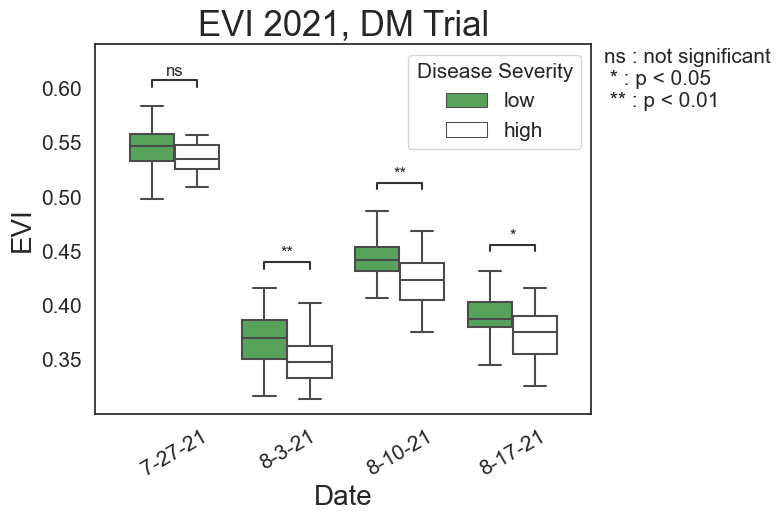

In [28]:
# x = "Date"
# y = "evi"
# hue = "disease_class"
# hue_order=['low', 'high']
# order = dm_trial['Date'].unique()[1:]
# pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low"))
#     ]

# colors = ["#4CAF50", "#FFFFFF"]
# sns.set_palette(sns.color_palette(colors))

# ax = sns.boxplot(data=dm_trial, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
# ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], fontsize=15, 
#                    rotation=30)

# add_stat_annotation(ax, data=dm_trial, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
#                     test='Mann-Whitney', loc='inside', verbose=2)

# plt.yticks(fontsize=15)
# plt.xlabel("Date", fontsize=20)
# plt.ylabel("EVI", fontsize= 20)
# plt.legend(title='Disease Severity', title_fontsize=15,fontsize=15, loc='upper right', bbox_to_anchor=(1.0, 1) )
# plt.figtext(0.92, 0.75, 'ns : not significant\n * : p < 0.05\n ** : p < 0.01', fontsize=15)
# plt.title("EVI 2021, DM Trial", fontsize=25)

# #plt.savefig('../figs/savi_boxplt.svg', bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-08-03_low v.s. 2021-08-03_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.081e-02 U_stat=9.770e+02
2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.234e-01 U_stat=6.330e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.821e-03 U_stat=1.155e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.268e-02 U_stat=1.066e+03


Text(0.5, 1.0, 'SAVI 2021, DM Trial')

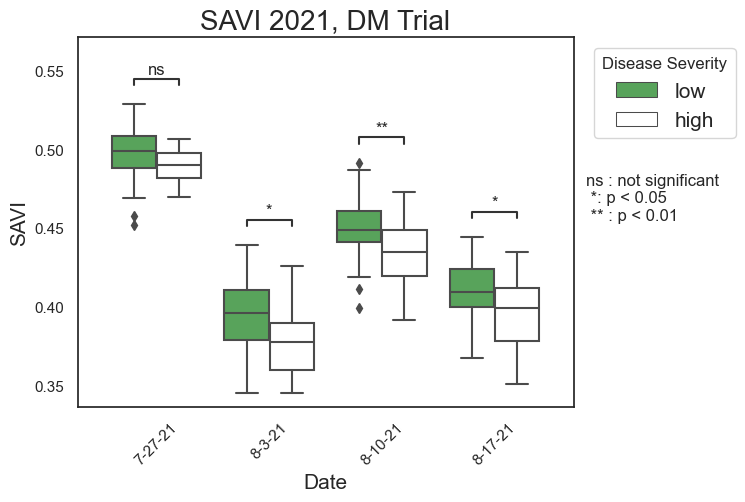

In [29]:
# x = "Date"
# y = "savi"
# hue = "disease_class"
# hue_order=['low', 'high']
# order = dm_trial['Date'].unique()[1:]
# pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low"))
#     ]

# colors = ["#4CAF50", "#FFFFFF"]
# sns.set_palette(sns.color_palette(colors))

# ax = sns.boxplot(data=dm_trial, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
# ax.set_xticklabels(labels = ['7-27-21','8-3-21','8-10-21','8-17-21'], 
#                    rotation=45)
# add_stat_annotation(ax, data=dm_trial, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
#                     test='Mann-Whitney', loc='inside', verbose=2)


# plt.xlabel("Date", fontsize=15)
# plt.ylabel("SAVI", fontsize= 15)
# plt.legend(title='Disease Severity',fontsize=15, loc='upper left', bbox_to_anchor=(1.02, 1) )
# plt.figtext(0.92, 0.5, 'ns : not significant\n *: p < 0.05\n ** : p < 0.01', fontsize=12)
# plt.title("SAVI 2021, DM Trial", fontsize=20)

# #plt.savefig('savi_boxplt.png', bbox_inches='tight')

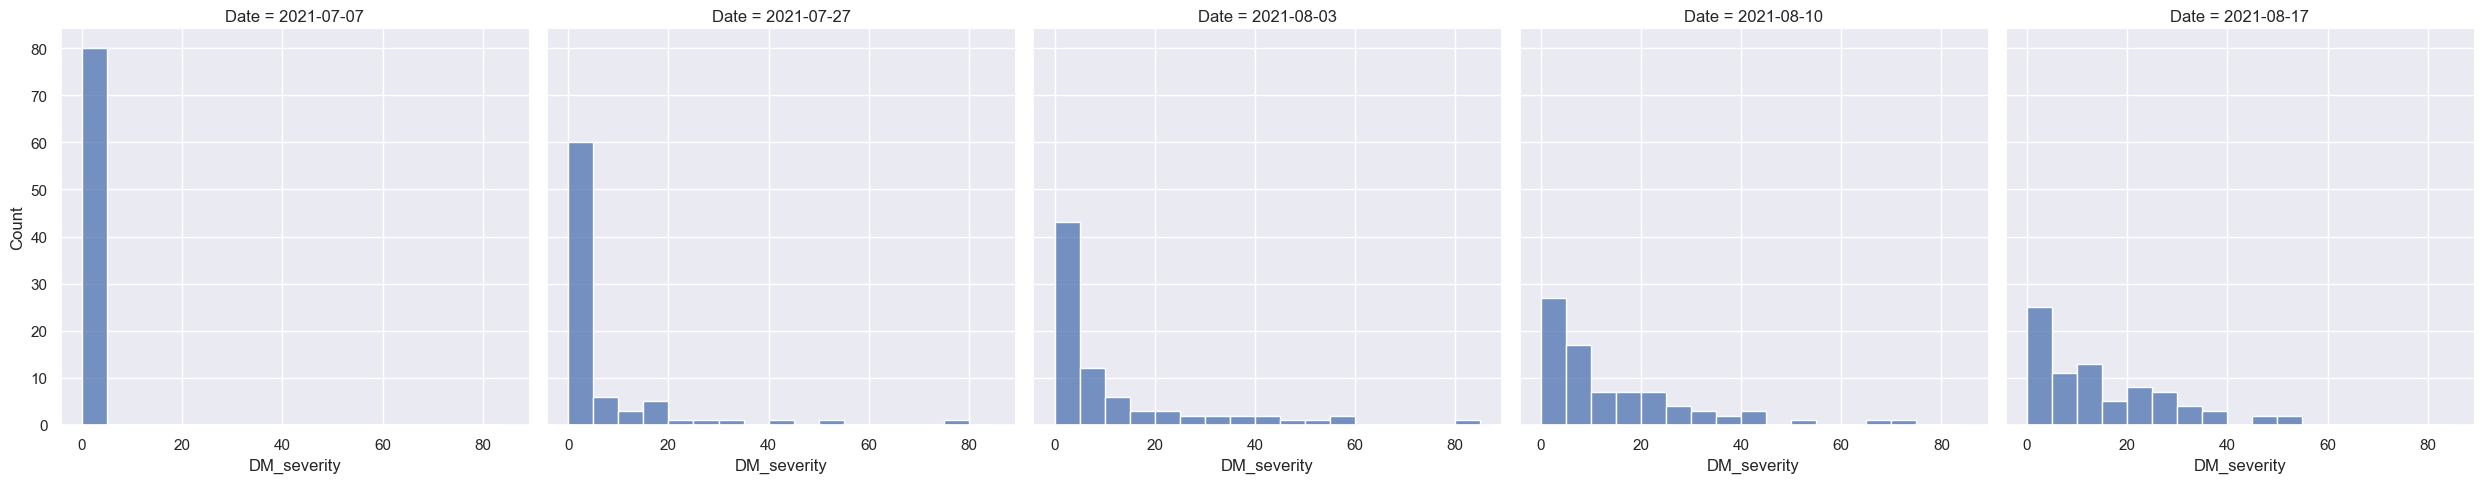

In [30]:
# sns.set_theme(style="darkgrid")

# sns.displot(
#     dm_trial, x="DM_severity", col="Date",
#     binwidth=5, height=5) #facet_kws=dict(margin_titles=True),

# plt.show()

Text(0.5, 1.0, 'DM Severity by Date, 2021\n DM Trial')

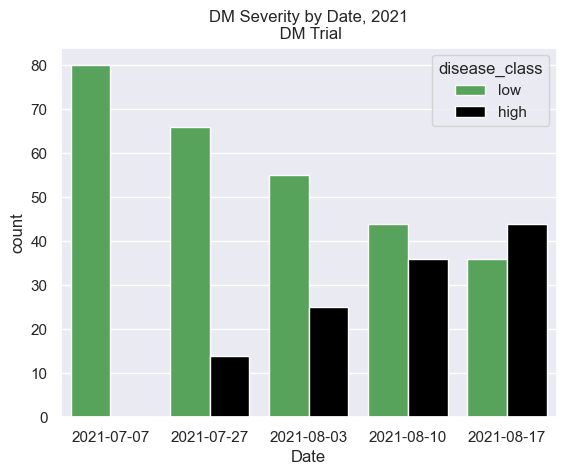

In [32]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

# sns.countplot(data=dm_trial, x="Date", hue="disease_class")
# plt.title('DM Severity by Date, 2021\n DM Trial')

# #plt.savefig('..figs/sevbydate_dmtrial.png')

Text(0.5, 1.0, 'DM Severity by Date, 2021\n All Rows')

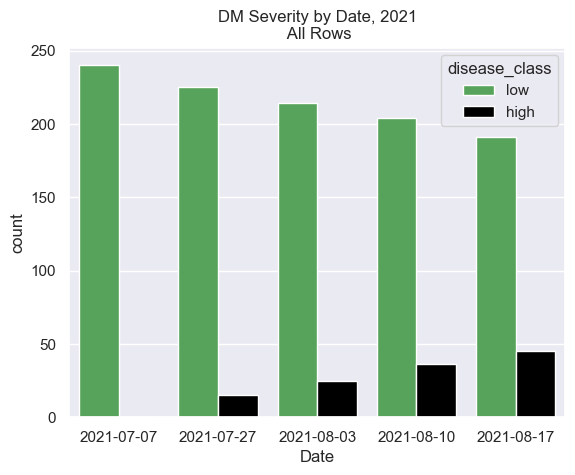

In [33]:
# sns.set_theme(style="darkgrid")
# colors = ["#4CAF50", "#000000"]
# sns.set_palette(sns.color_palette(colors))

# sns.countplot(data=df_2021, x="Date", hue="disease_class")
# plt.title('DM Severity by Date, 2021\n All Rows')

# #plt.savefig('../figs/sevbydate.png')

In [8]:
# Visualize correlations between wavelengths, VIs, and disease

# first filter the df to just these columns

df_vis.columns.unique()


Index(['acquired', 'plot', 'blue', 'green', 'red', 'nir', 'veg_smr',
       'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue', 'row', 'panel',
       'Date', 'Treatment', 'Block', 'PM_severity', 'DM_severity', 'total_dis',
       'geometry', 'centroid', 'PM_inc', 'DM_inc', 'sr', 'msr', 'dvi', 'nirv',
       'gcc', 'tvi', 'sev_class', 'inc_class'],
      dtype='object')

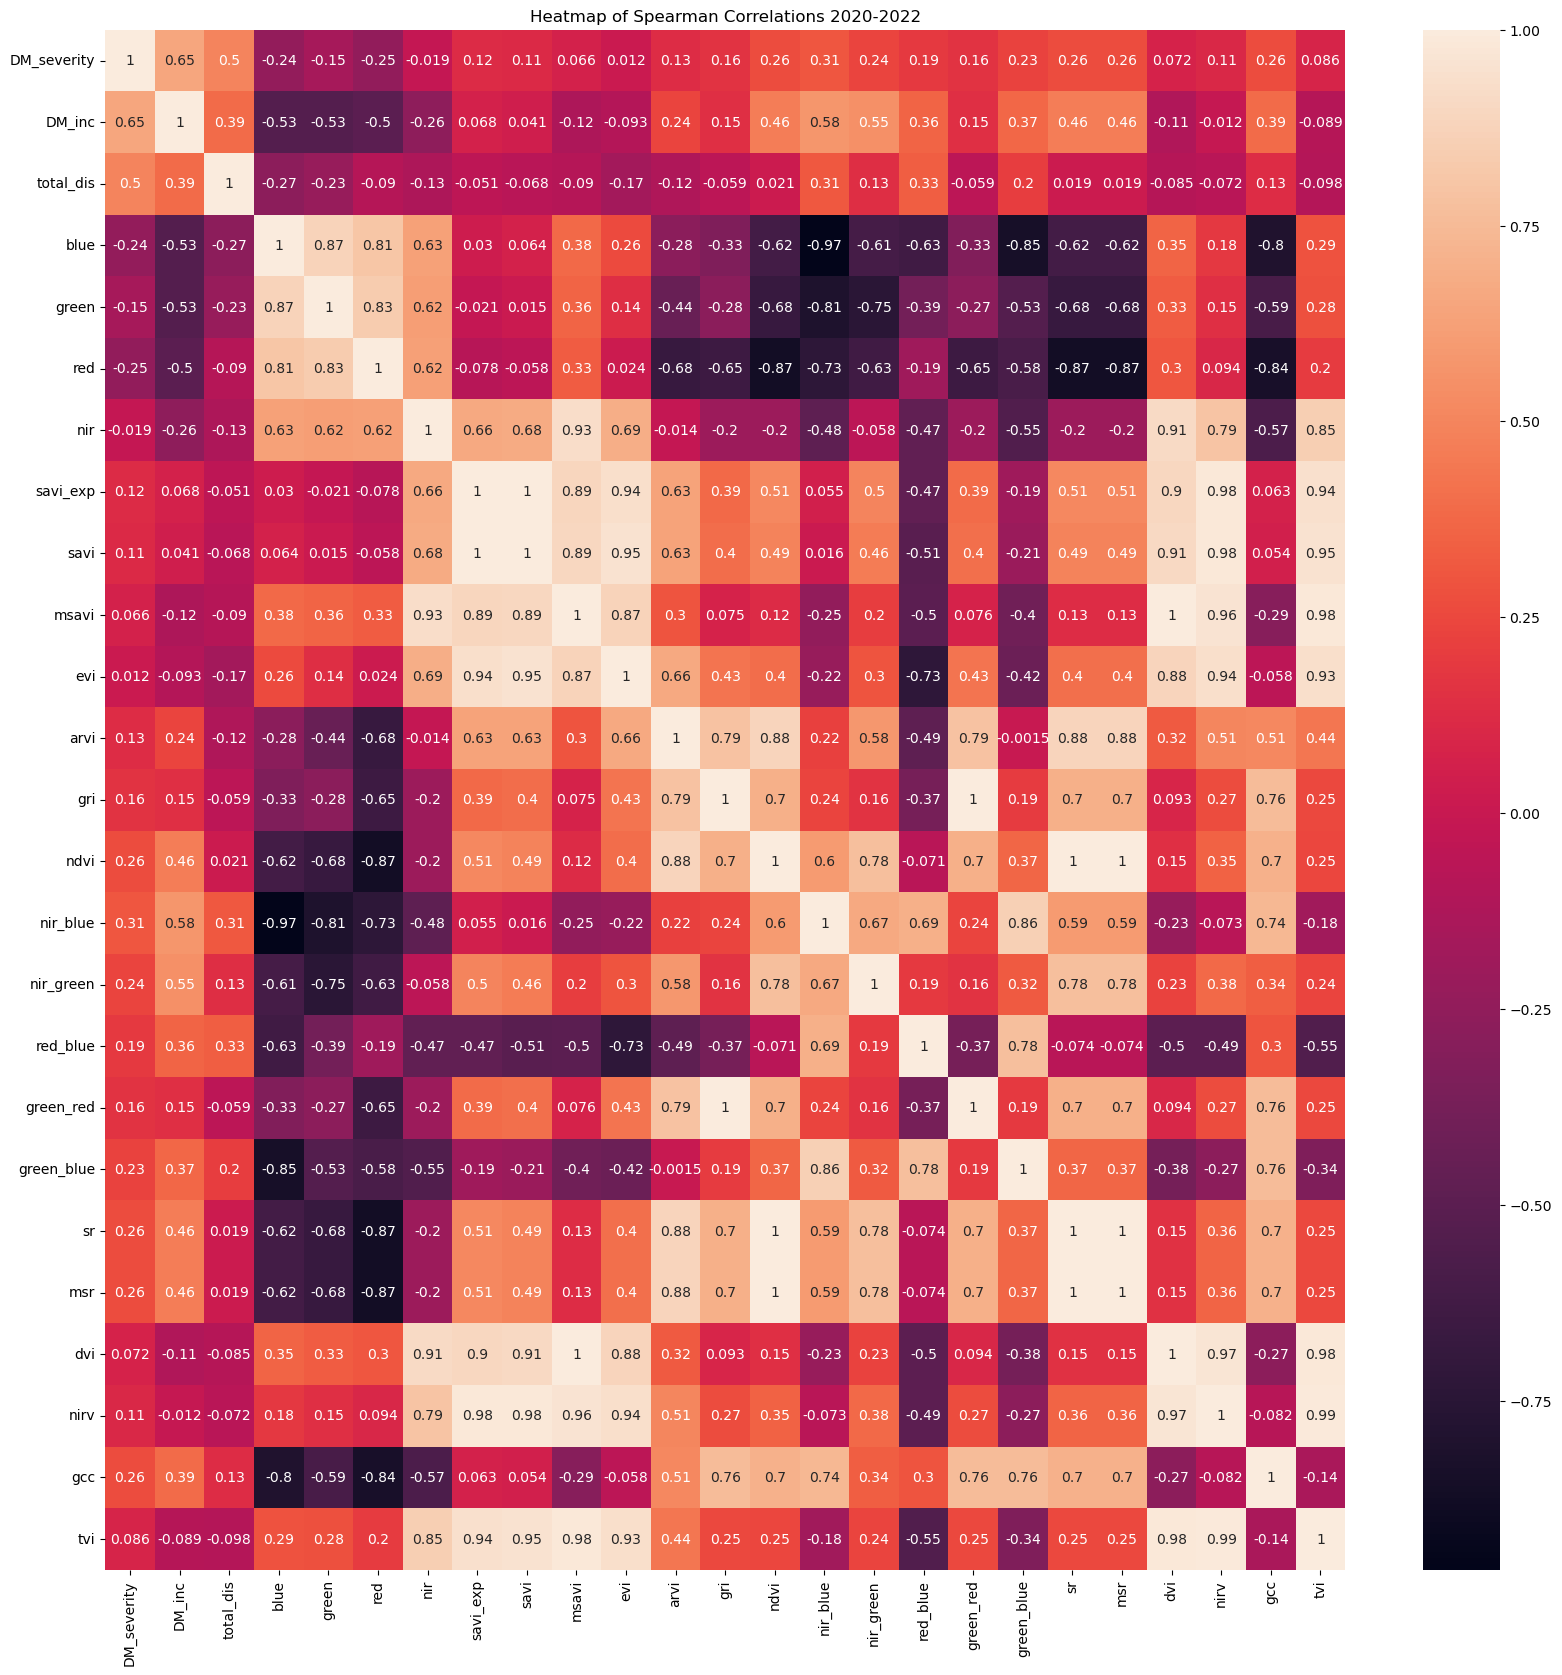

In [11]:
cols = ['DM_severity', 'DM_inc', 'total_dis', 'blue', 'green', 'red', 'nir', 
        'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue',
       'sr', 'msr', 'dvi', 'nirv','gcc', 'tvi']
filtered = df_vis[cols]
correlations = filtered.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Spearman Correlations 2020-2022');
plt.show()

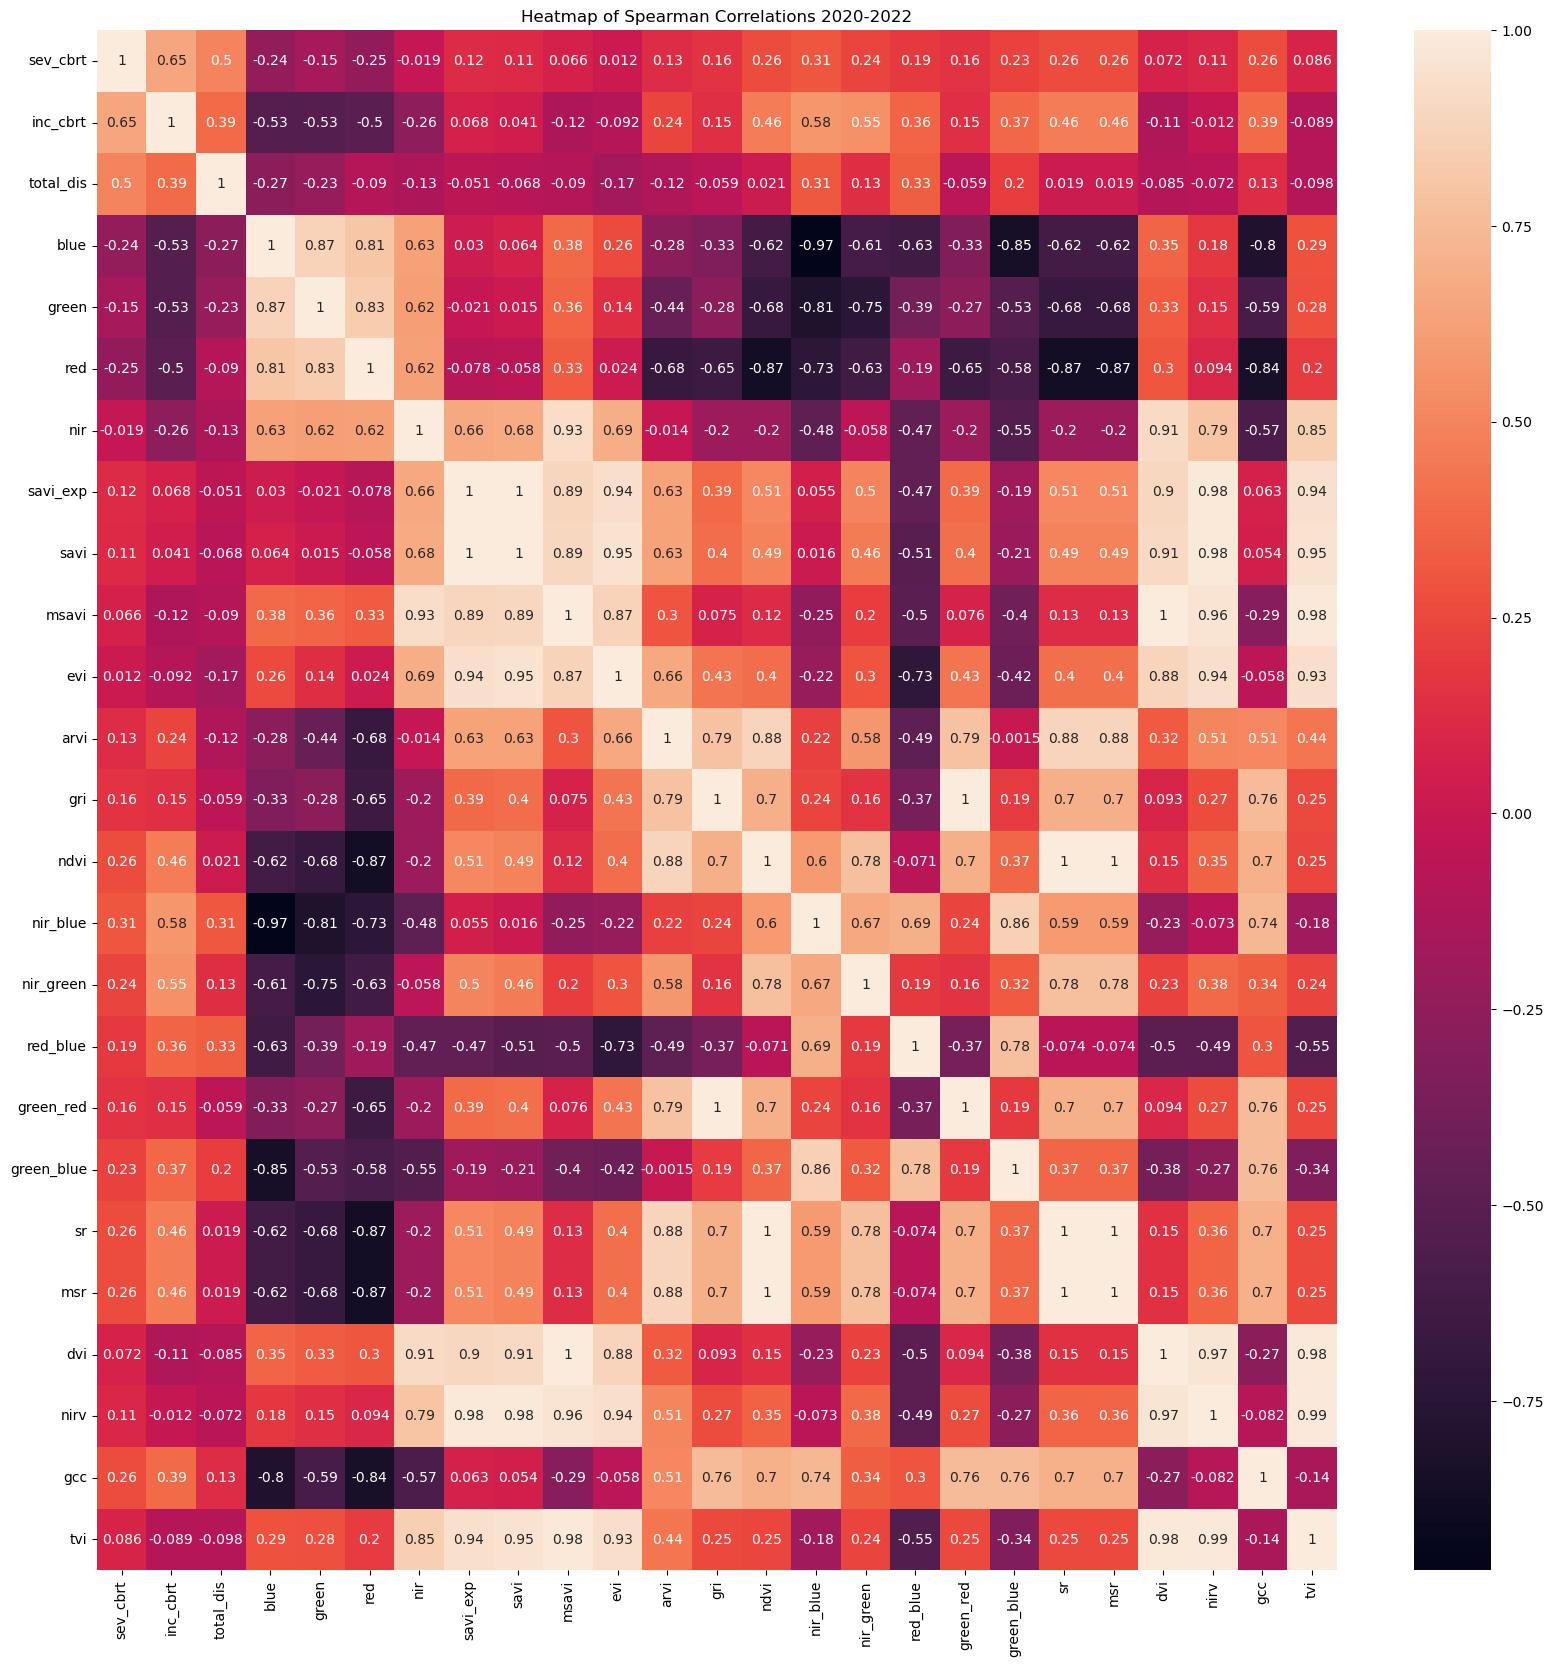

In [20]:
cols = ['sev_cbrt', 'inc_cbrt', 'total_dis', 'blue', 'green', 'red', 'nir', 
        'savi_exp', 'savi', 'msavi', 'evi', 'arvi', 'gri', 'ndvi', 'nir_blue',
       'nir_green', 'red_blue', 'green_red', 'green_blue',
       'sr', 'msr', 'dvi', 'nirv','gcc', 'tvi']
filtered = df_vis[cols]
correlations = filtered.corr(method='spearman')

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True).set(title='Heatmap of Spearman Correlations 2020-2022');
plt.show()

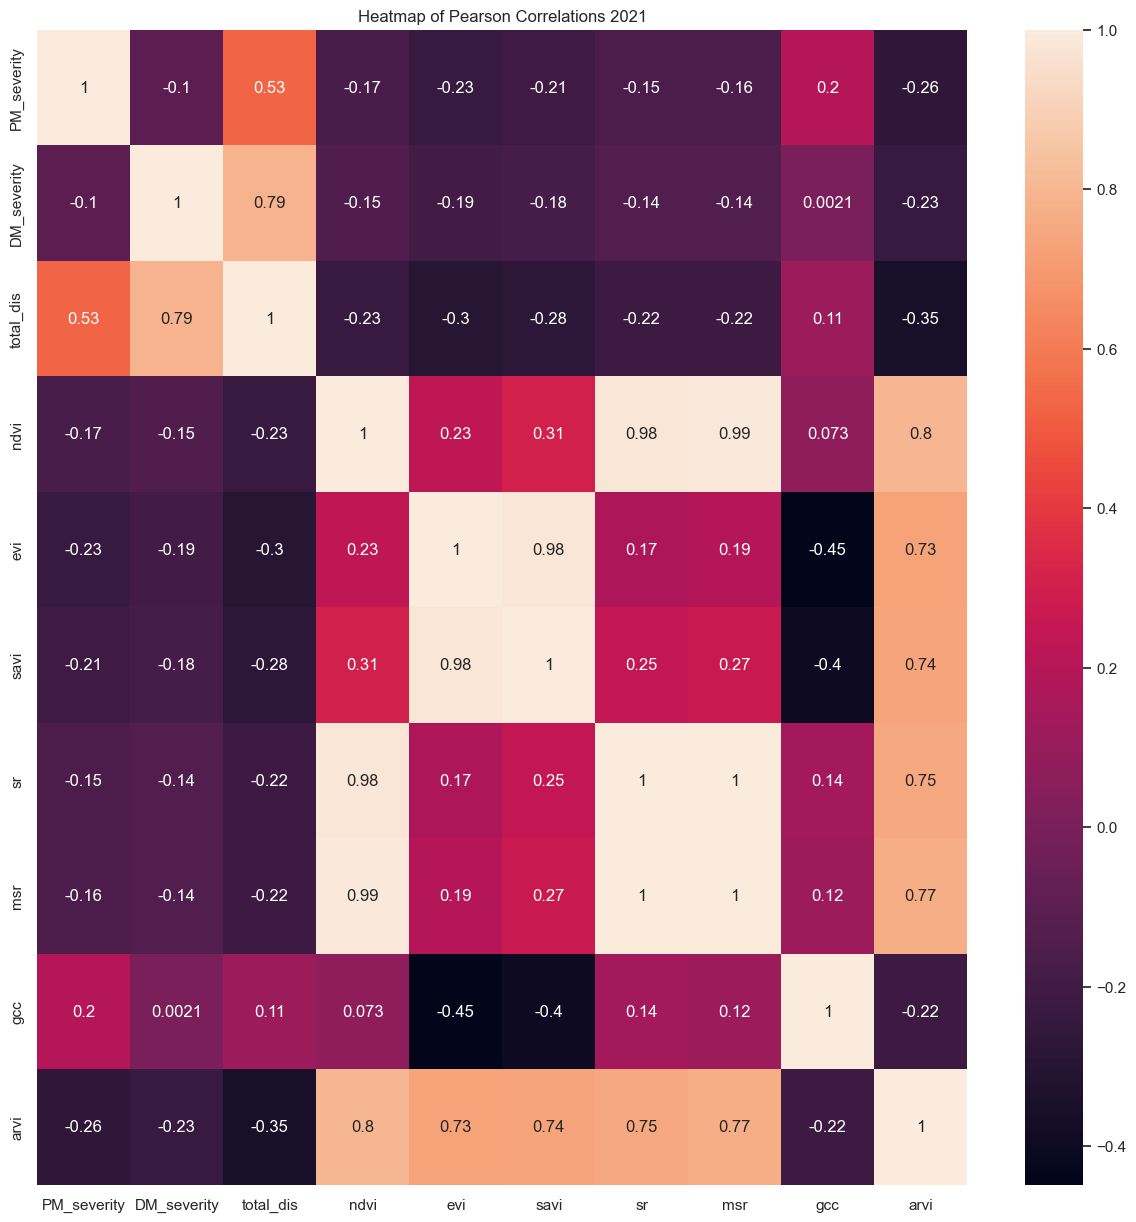

In [36]:
filtered_2021 = df_2021[cols]
correlations_2021 = filtered_2021.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(correlations_2021, annot=True).set(title='Heatmap of Pearson Correlations 2021');
plt.show()

In [37]:
from scipy.stats import spearmanr

In [38]:
# Check spearman's R for disease vs. EVI in 2021

corr, _ = spearmanr(df_2021['DM_severity'], df_2021['evi'])
print("Spearman's correlation EVI, 2021: %.3f" % corr)
print('p-value: %.3f' %_)

Spearman's correlation EVI, 2021: -0.178
p-value: 0.000


In [39]:
# Check spearman's R for disease vs. ARVI in 2021

corr, _ = spearmanr(df_2021['DM_severity'], df_2021['arvi'])
print("Spearman's correlation ARVI, 2021: %.3f" % corr)
print('p-value: %.3f' %_)

Spearman's correlation ARVI, 2021: -0.304
p-value: 0.000


In [40]:
from scipy import stats
def mann_whitney_u_test(distribution_1, distribution_2):
    """
    Perform the Mann-Whitney U Test, comparing two different distributions.
    Args:
       distribution_1: List. 
       distribution_2: List.
    Outputs:
        u_statistic: Float. U statisitic for the test.
        p_value: Float.
    """
    u_statistic, p_value = stats.mannwhitneyu(distribution_1, distribution_2)
    return print("Mann-Whitney U:", u_statistic, "p-value:", p_value)


#### MAIN FUNCTION ####
#Perform the Mann-Whitney U Test on the two distributions

high_2021 = df_2021[df_2021['disease_class']=='high']
low_2021 = df_2021[df_2021['disease_class']=='low']

In [41]:
mann_whitney_u_test(high_2021['arvi'], low_2021['arvi'])

Mann-Whitney U: 37414.0 p-value: 1.8798564187286408e-14


In [42]:
mann_whitney_u_test(high_2021['savi'], low_2021['savi'])

Mann-Whitney U: 45430.0 p-value: 5.5962957162352214e-08


In [43]:
mann_whitney_u_test(high_2021['evi'], low_2021['evi'])

Mann-Whitney U: 44764.0 p-value: 1.9509066616126387e-08


In [44]:
mann_whitney_u_test(high_2021['ndvi'], low_2021['ndvi'])

Mann-Whitney U: 48678.0 p-value: 5.933512271808268e-06


In [45]:
high_2021.iloc[:, 2:6]

,blue,green,red,nir
257,0.039979,0.076186,0.058634,0.357662
264,0.041257,0.076057,0.054167,0.355180
265,0.041457,0.077332,0.058714,0.357157
273,0.043690,0.078921,0.062028,0.346786
274,0.041176,0.079490,0.061128,0.347045
...,...,...,...,...
1031,0.017131,0.067779,0.051631,0.247683
1032,0.014800,0.065496,0.046896,0.265800
1036,0.009743,0.065223,0.044500,0.261313
1037,0.013334,0.064976,0.045017,0.265424


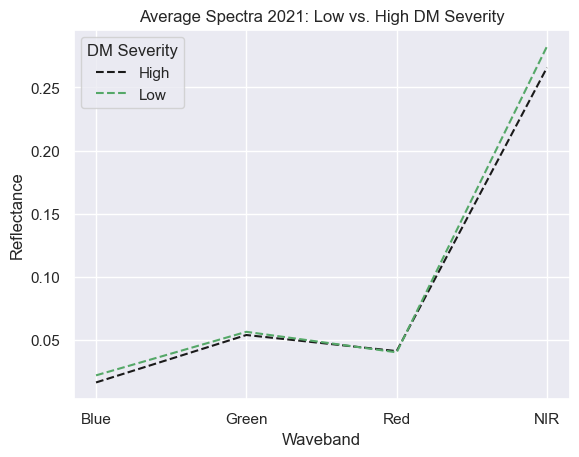

In [46]:
plt.plot(high_2021.iloc[:, 2:6].mean(), '--k', label='High')
plt.plot(low_2021.iloc[:, 2:6].mean(), '--g', label='Low')

plt.xlabel('Waveband')
plt.ylabel('Reflectance')
plt.xticks(np.arange(4), ['Blue', 'Green', 'Red', 'NIR'])
plt.legend(title='DM Severity')
plt.title('Average Spectra 2021: Low vs. High DM Severity')
plt.show()

In [47]:
# Importing library
from scipy.stats import f_oneway

f_oneway(high_2021['arvi'], low_2021['arvi'])

F_onewayResult(statistic=58.883750103284534, pvalue=3.462067830309952e-14)

In [48]:
f_oneway(high_2021['evi'], low_2021['evi'])

F_onewayResult(statistic=36.06989054983817, pvalue=2.5237972385760686e-09)

In [49]:
f_oneway(high_2021['savi'], low_2021['savi'])

F_onewayResult(statistic=30.061090124947423, pvalue=5.1058325860758224e-08)

In [50]:
f_oneway(high_2021['ndvi'], low_2021['ndvi'])

F_onewayResult(statistic=24.291842994272535, pvalue=9.446411105902329e-07)

In [51]:
high_2021.shape

(121, 24)

In [52]:
low_2021.shape

(1074, 24)

In [53]:
dm_high = high_2021[high_2021['row']<=5]
dm_low = low_2021[low_2021['row']<=5]

mann_whitney_u_test(dm_high['arvi'], dm_low['arvi'])

Mann-Whitney U: 7421.0 p-value: 1.418789331476936e-18


In [54]:
mann_whitney_u_test(dm_high['evi'], dm_low['evi'])

Mann-Whitney U: 9043.0 p-value: 3.8280110533687407e-13


In [55]:
mann_whitney_u_test(dm_high['savi'], dm_low['savi'])

Mann-Whitney U: 9402.0 p-value: 4.456493446506538e-12


In [57]:
# # Let's try a model
# import sklearn

# feature_names = ['blue', 'green', 'red', 'nir', 'ndvi', 'evi', 'arvi', 'savi']
# X = df_2021[feature_names]
# y = df_2021['disease_class']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [58]:
# print('Training feature size:',X_train.shape[0])
# print('Test feature size:',X_test.shape[0])


Training feature size: 896
Test feature size: 299


In [59]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#      .format(logreg.score(X_train, y_train)))
# print('Accuracy of Logistic regression classifier on test set: {:.2f}'
#      .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.88


In [60]:
# predictions = logreg.predict(X_test)
# score = logreg.score(X_test, y_test)
# from sklearn import metrics
# cm = metrics.confusion_matrix(y_test, predictions)
# print(cm)

[[  0  35]
 [  0 264]]


In [61]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier().fit(X_train, y_train)
# print('Accuracy of Decision Tree classifier on training set: {:.2f}'
#      .format(clf.score(X_train, y_train)))
# print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#      .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


In [62]:
# predictions_clf = clf.predict(X_test)
# score_clf = clf.score(X_test, y_test)
# from sklearn import metrics
# cm_clf = metrics.confusion_matrix(y_test, predictions_clf)
# print(cm_clf)

[[  5  30]
 [ 26 238]]


In [63]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(knn.score(X_train, y_train)))
# print('Accuracy of K-NN classifier on test set: {:.2f}'
#      .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.91
Accuracy of K-NN classifier on test set: 0.88


In [64]:
# predictions_knn = knn.predict(X_test)
# score_knn = knn.score(X_test, y_test)
# from sklearn import metrics
# cm_knn = metrics.confusion_matrix(y_test, predictions_knn)
# print(cm_knn)

[[  3  32]
 [  5 259]]


In [65]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# lda.fit(X_train, y_train)
# print('Accuracy of LDA classifier on training set: {:.2f}'
#      .format(lda.score(X_train, y_train)))
# print('Accuracy of LDA classifier on test set: {:.2f}'
#      .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.90
Accuracy of LDA classifier on test set: 0.88


In [66]:
# predictions_lda = lda.predict(X_test)
# score_lda = lda.score(X_test, y_test)
# from sklearn import metrics
# cm_lda = metrics.confusion_matrix(y_test, predictions_lda)
# print(cm_lda)

[[  0  35]
 [  1 263]]


In [67]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# print('Accuracy of GNB classifier on training set: {:.2f}'
#      .format(gnb.score(X_train, y_train)))
# print('Accuracy of GNB classifier on test set: {:.2f}'
#      .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.78
Accuracy of GNB classifier on test set: 0.78


In [68]:
# predictions_gnb = gnb.predict(X_test)
# score_gnb = gnb.score(X_test, y_test)
# from sklearn import metrics
# cm_gnb = metrics.confusion_matrix(y_test, predictions_gnb)
# print(cm_gnb)

[[  9  26]
 [ 40 224]]


In [69]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(X_train, y_train)
# print('Accuracy of SVM classifier on training set: {:.2f}'
#      .format(svm.score(X_train, y_train)))
# print('Accuracy of SVM classifier on test set: {:.2f}'
#      .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.90
Accuracy of SVM classifier on test set: 0.88


In [70]:
# predictions_svm = svm.predict(X_test)
# score_svm = svm.score(X_test, y_test)
# from sklearn import metrics
# cm_svm = metrics.confusion_matrix(y_test, predictions_svm)
# print(cm_svm)

[[  0  35]
 [  0 264]]
